In [37]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.wireframe import Wireframe
import keras 
from knn import knn
from samples.wireframe.database_actions import reinitialize_table, add_encoding
from samples.wireframe.knn import overlaps_bool
import plots

%matplotlib inline 

In [38]:
config = Wireframe.WireframeConfig()
WIREFRAME_DIR = os.path.join(ROOT_DIR, "datasets/wireframe")

Run with training **icons** and training **backgrounds**, but without the one-shot classes. 

In [52]:
NUM_TRAINING_IMAGES = 100
MAX_ICONS_PER_IMAGE = 1

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [40]:
MODEL_NAME = "Mask_Res50.h5"

class InferenceConfig(Wireframe.WireframeConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, MODEL_NAME)
# model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /Users/alexanderholstrup/git/Mask_RCNN/Mask_Res50.h5


In [48]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))

Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50


IndexError: list index out of range

In [44]:
from model_triplet import Model 
from samples.wireframe.database_actions import get_known_encodings

In [45]:
train_embeddings, train_labels = get_known_encodings('Database.db', 1024)

In [49]:
val_embeddings, val_labels = get_known_encodings('Database.db', 1024)

In [50]:
np.shape(val_embeddings)

(1024, 54)

Train on 213 samples, validate on 54 samples
Epoch 1/1000
 - 4s - loss: 0.2998 - acc: 0.0047 - val_loss: 0.2999 - val_acc: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 0.2997 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 4/1000
 - 0s - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.2997 - val_acc: 0.0000e+00
Epoch 5/1000
 - 0s - loss: 0.2995 - acc: 0.0000e+00 - val_loss: 0.2996 - val_acc: 0.0000e+00
Epoch 6/1000
 - 0s - loss: 0.2994 - acc: 0.0000e+00 - val_loss: 0.2996 - val_acc: 0.0000e+00
Epoch 7/1000
 - 0s - loss: 0.2993 - acc: 0.0000e+00 - val_loss: 0.2995 - val_acc: 0.0000e+00
Epoch 8/1000
 - 0s - loss: 0.2992 - acc: 0.0000e+00 - val_loss: 0.2994 - val_acc: 0.0000e+00
Epoch 9/1000
 - 0s - loss: 0.2991 - acc: 0.0000e+00 - val_loss: 0.2993 - val_acc: 0.0000e+00
Epoch 10/1000
 - 0s - loss: 0.2990 - acc: 0.0000e+00 - val_loss: 0.2992 - val_acc: 0.0000e+00
Epoch 11/1000
 - 0s - loss: 

/usr/local/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106841). Check your callbacks.
  % delta_t_median)


Epoch 81/1000
 - 0s - loss: 0.2846 - acc: 0.0047 - val_loss: 0.2895 - val_acc: 0.0000e+00
Epoch 82/1000
 - 0s - loss: 0.2849 - acc: 0.0047 - val_loss: 0.2893 - val_acc: 0.0000e+00
Epoch 83/1000
 - 0s - loss: 0.2840 - acc: 0.0141 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 84/1000
 - 0s - loss: 0.2839 - acc: 0.0141 - val_loss: 0.2888 - val_acc: 0.0000e+00
Epoch 85/1000
 - 0s - loss: 0.2830 - acc: 0.0141 - val_loss: 0.2886 - val_acc: 0.0000e+00
Epoch 86/1000
 - 0s - loss: 0.2832 - acc: 0.0188 - val_loss: 0.2884 - val_acc: 0.0000e+00
Epoch 87/1000
 - 0s - loss: 0.2825 - acc: 0.0188 - val_loss: 0.2881 - val_acc: 0.0000e+00
Epoch 88/1000
 - 0s - loss: 0.2820 - acc: 0.0188 - val_loss: 0.2879 - val_acc: 0.0000e+00
Epoch 89/1000
 - 0s - loss: 0.2816 - acc: 0.0188 - val_loss: 0.2876 - val_acc: 0.0000e+00
Epoch 90/1000
 - 0s - loss: 0.2815 - acc: 0.0188 - val_loss: 0.2874 - val_acc: 0.0000e+00
Epoch 91/1000
 - 0s - loss: 0.2817 - acc: 0.0188 - val_loss: 0.2871 - val_acc: 0.0000e+00
Epoch 92/1

Epoch 174/1000
 - 0s - loss: 0.2380 - acc: 0.0469 - val_loss: 0.2598 - val_acc: 0.0000e+00
Epoch 175/1000
 - 0s - loss: 0.2380 - acc: 0.0235 - val_loss: 0.2593 - val_acc: 0.0000e+00
Epoch 176/1000
 - 0s - loss: 0.2378 - acc: 0.0141 - val_loss: 0.2589 - val_acc: 0.0000e+00
Epoch 177/1000
 - 0s - loss: 0.2376 - acc: 0.0141 - val_loss: 0.2584 - val_acc: 0.0000e+00
Epoch 178/1000
 - 0s - loss: 0.2387 - acc: 0.0141 - val_loss: 0.2580 - val_acc: 0.0000e+00
Epoch 179/1000
 - 0s - loss: 0.2389 - acc: 0.0141 - val_loss: 0.2576 - val_acc: 0.0000e+00
Epoch 180/1000
 - 0s - loss: 0.2350 - acc: 0.0094 - val_loss: 0.2571 - val_acc: 0.0000e+00
Epoch 181/1000
 - 0s - loss: 0.2332 - acc: 0.0094 - val_loss: 0.2567 - val_acc: 0.0000e+00
Epoch 182/1000
 - 0s - loss: 0.2338 - acc: 0.0047 - val_loss: 0.2562 - val_acc: 0.0000e+00
Epoch 183/1000
 - 0s - loss: 0.2313 - acc: 0.0047 - val_loss: 0.2557 - val_acc: 0.0000e+00
Epoch 184/1000
 - 0s - loss: 0.2336 - acc: 0.0000e+00 - val_loss: 0.2553 - val_acc: 0.0000

Epoch 261/1000
 - 0s - loss: 0.1676 - acc: 0.0000e+00 - val_loss: 0.1990 - val_acc: 0.0000e+00
Epoch 262/1000
 - 0s - loss: 0.1675 - acc: 0.0000e+00 - val_loss: 0.1984 - val_acc: 0.0000e+00
Epoch 263/1000
 - 0s - loss: 0.1722 - acc: 0.0000e+00 - val_loss: 0.1976 - val_acc: 0.0000e+00
Epoch 264/1000
 - 0s - loss: 0.1690 - acc: 0.0000e+00 - val_loss: 0.1970 - val_acc: 0.0000e+00
Epoch 265/1000
 - 0s - loss: 0.1693 - acc: 0.0000e+00 - val_loss: 0.1963 - val_acc: 0.0000e+00
Epoch 266/1000
 - 0s - loss: 0.1707 - acc: 0.0000e+00 - val_loss: 0.1957 - val_acc: 0.0000e+00
Epoch 267/1000
 - 0s - loss: 0.1680 - acc: 0.0000e+00 - val_loss: 0.1952 - val_acc: 0.0000e+00
Epoch 268/1000
 - 0s - loss: 0.1732 - acc: 0.0000e+00 - val_loss: 0.1946 - val_acc: 0.0000e+00
Epoch 269/1000
 - 0s - loss: 0.1711 - acc: 0.0000e+00 - val_loss: 0.1940 - val_acc: 0.0000e+00
Epoch 270/1000
 - 0s - loss: 0.1663 - acc: 0.0000e+00 - val_loss: 0.1933 - val_acc: 0.0000e+00
Epoch 271/1000
 - 0s - loss: 0.1652 - acc: 0.0000e

Epoch 348/1000
 - 0s - loss: 0.1559 - acc: 0.0000e+00 - val_loss: 0.1533 - val_acc: 0.0000e+00
Epoch 349/1000
 - 0s - loss: 0.1626 - acc: 0.0000e+00 - val_loss: 0.1535 - val_acc: 0.0000e+00
Epoch 350/1000
 - 0s - loss: 0.1614 - acc: 0.0000e+00 - val_loss: 0.1536 - val_acc: 0.0000e+00
Epoch 351/1000
 - 0s - loss: 0.1563 - acc: 0.0000e+00 - val_loss: 0.1535 - val_acc: 0.0000e+00
Epoch 352/1000
 - 0s - loss: 0.1524 - acc: 0.0000e+00 - val_loss: 0.1533 - val_acc: 0.0000e+00
Epoch 353/1000
 - 0s - loss: 0.1645 - acc: 0.0000e+00 - val_loss: 0.1532 - val_acc: 0.0000e+00
Epoch 354/1000
 - 0s - loss: 0.1701 - acc: 0.0000e+00 - val_loss: 0.1532 - val_acc: 0.0000e+00


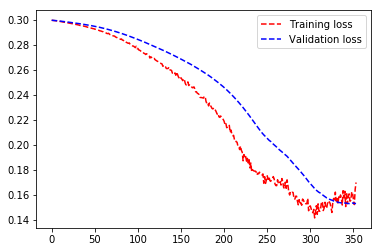

In [51]:
from model_triplet import Model 
from samples.wireframe.database_actions import get_known_encodings


#Save the losses
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.trainlosses = []
        self.vallosses = []

    def on_epoch_end(self, epoch, logs={}):
        self.trainlosses.append(logs.get('loss'))
        self.vallosses.append(logs.get('val_loss'))

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8,
                                           verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#embeddings, labels = get_known_encodings('Database.db', 1024)


triplet_model = Model()
#Train the model
history = LossHistory()
triplet_model.model.fit(train_embeddings.T, train_labels, batch_size=50, epochs=1000, 
                        callbacks=[history, stop_early], validation_data=(val_embeddings.T, val_labels)
                        ,verbose=2)



#Plot the training loss
line1 = plt.plot(history.trainlosses, 'r--', label = "Training loss")
plt.plot(history.vallosses, 'b--', label = "Validation loss")
plt.legend()
plt.show()


#Save the weights
triplet_model.model.save_weights("Triplet_Res50_03.h5")




### With one shot classes

In [53]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                embedding = triplet_model.model.predict(embedding)
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))

Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

IndexError: list index out of range

### Switch out data for test data! 

In [54]:
NUM_TRAINING_IMAGES = 200
MAX_ICONS_PER_IMAGE = 1

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [ ]:
matrix_embeddings, labels = get_known_encodings('Database.db', 128)
K = 3

y_true = []
y_pred = []

for image_id in dataset_train.image_ids:
    if image_id % 10 == 0:
        print("Iteration {}".format(image_id))
    
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                                   image_id, use_mini_mask=False)
    results = model.detect([original_image])
    
    embeddings = results[1]
    
    if np.shape(embeddings)[1] == 0:
        print("Skipping at iteration {}. Label {}".format(image_id, real_labels[0]))
        continue
    
    embeddings = triplet_model.model.predict(embeddings[:, 0, :])
    predictions = [i[0] for i in knn(embeddings, matrix_embeddings, labels, K)]
    final_prediction = max(set(predictions), key=predictions.count)
    
    y_true.append(dataset_train.class_names[real_labels[0]])
    y_pred.append(dataset_train.class_names[final_prediction])

Iteration 0
Skipping at iteration 7. Label 5
Iteration 10
Skipping at iteration 11. Label 8
Skipping at iteration 13. Label 13
Iteration 20
Skipping at iteration 22. Label 11
Skipping at iteration 25. Label 2
Iteration 30
Iteration 40
Skipping at iteration 47. Label 8
Skipping at iteration 48. Label 2
Iteration 50
Skipping at iteration 50. Label 8
Iteration 60
Skipping at iteration 66. Label 13
Skipping at iteration 68. Label 8
Iteration 70
Skipping at iteration 70. Label 12
Iteration 80
Iteration 90
Skipping at iteration 93. Label 8
Iteration 100
Iteration 110
Skipping at iteration 112. Label 9
Skipping at iteration 114. Label 12
Skipping at iteration 119. Label 5
Iteration 120
Skipping at iteration 120. Label 6
Skipping at iteration 125. Label 5
Iteration 130
Skipping at iteration 131. Label 2
Skipping at iteration 133. Label 15
Skipping at iteration 135. Label 11
Skipping at iteration 136. Label 8
Skipping at iteration 139. Label 11
Iteration 140
Skipping at iteration 142. Label 15


In [ ]:
confusion_matrix = plots.plot_confusion_matrix(y_true, y_pred, normalize=False)